# Matrix Analysis 2023 - EE312
## Linear regression - Gaussian and polynomial kernels

Let us study a small example of linear regression using either polynomials or gaussian kernels.

The problem we intend to solve is $y=f(x,\beta) = \sum_{j=1}^n \beta_j\varphi_j(x)$.

This can be rewritten as a linear system $y=Ab$ using,

$y=\begin{pmatrix}y_1\\y_2\\ \vdots\\y_m\end{pmatrix}\in\mathbb{R}^m$, 
$A=\begin{pmatrix}
\varphi_1(x_1) & ... & \varphi_n(x_1)\\
\vdots & & \vdots\\
\varphi_1(x_m) & ... & \varphi_n(x_m)
\end{pmatrix}\in\mathbb{R}^{m\times n}$, 
$b=\begin{pmatrix}\beta_1\\ \beta_2 \\ \vdots \\ \beta_n\end{pmatrix}\in\mathbb{R}^n$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Let us generate a test signal for $y$ (with a bit of noise).

In [2]:
N = 100
x = np.arange(0, N)
y = np.sin(0.1*x) + (x/50)**2 
yn = y + 0.3*np.random.randn(N)

we will only use half of the samples of the complete signal

In [3]:
xs = x[np.arange(0, N, 2)]
yns = yn[np.arange(0, N, 2)]

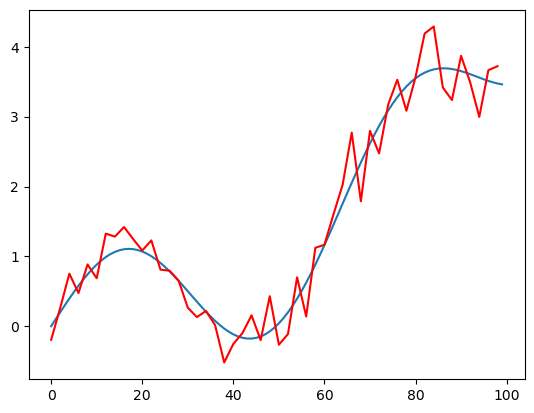

In [4]:
plt.plot(y)
plt.plot(xs, yns, 'r')

Let us define a translated gaussian kernel function for $\varphi$

In [5]:
def phi(n, x):
    return np.exp(-0.05*(x-n)**2)

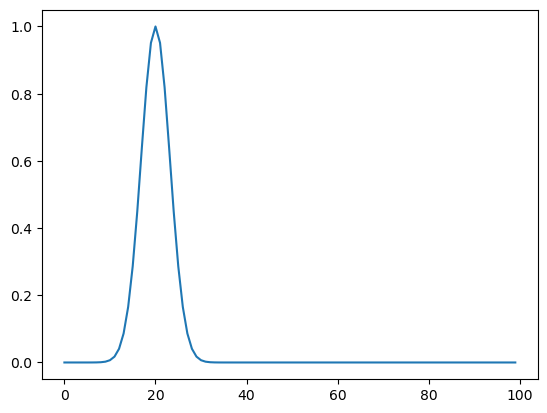

In [6]:
plt.plot(phi(20, x))

In [7]:
A = np.zeros((N//2, N//4))

In [8]:
for k in range(N//4):
    A[:, k] = phi(4*k, xs)

In [9]:
beta = np.linalg.inv(A.T@A)@(A.T@yns)

In [10]:
beta

array([-0.60727147,  0.9699325 , -0.20206214,  0.92910944,  0.66597623,
        0.56919546,  0.55053125,  0.25796854,  0.03035851,  0.14086085,
       -0.5588691 ,  0.32597652,  0.02226449, -0.31552763,  0.67310062,
        0.02047848,  1.80303478,  0.64107712,  1.6588235 ,  1.52966107,
        1.88220273,  2.14524924,  2.0544795 ,  0.68988954,  3.46757971])

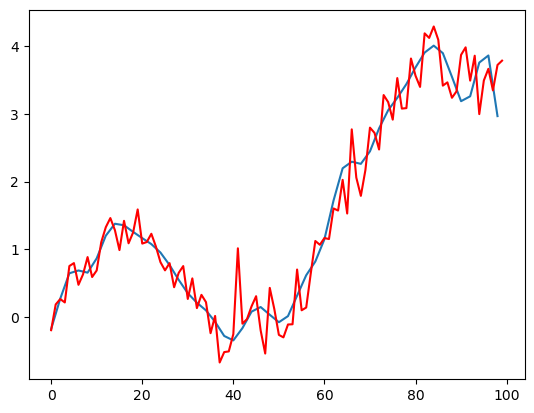

In [11]:
plt.plot(xs, A@beta)
plt.plot(yn, 'r')

Another common choice for $\varphi$ is to use polynomials.

In [12]:
Ap = np.zeros((N//2, N//8))
for k in range(N//8):
    Ap[:, k] = np.power(xs,k)

In [13]:
bp = np.linalg.inv(Ap.T@Ap)@(Ap.T@yns)

In [14]:
bp

array([-1.16369750e-01,  1.86440657e-01, -1.39004691e-02,  1.31884997e-03,
       -9.12421101e-05,  3.26877722e-06, -6.37590278e-08,  6.97402375e-10,
       -4.04475851e-12,  9.70931088e-15, -7.19761405e-21, -1.26059752e-20])

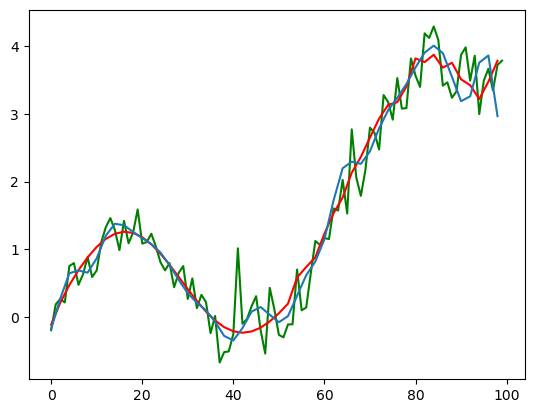

In [15]:
plt.plot(yn, 'g')
plt.plot(xs, Ap@bp, 'r')
plt.plot(xs, A@beta)
